# Part 4: One-dimensional Kalman Filter without process noise

In the following i will provide a example for 5 iterations.
The initial values will be:
- True height of the building: 50 meters
- Standard deviation of the measuring tool: 5 meters

We take a wild guess by looking at the bulding and estimate 60 meters.<br>
The estimate uncertantiy in a human is about 15 meters (standard deviation).

In [195]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
def noisy_measurement(x):
    return np.random.normal(x,5,1)[0]

m_sigma = 5

In [92]:
# Iteration 0
true_height = 50
x0 = 60 #meters
p0 = 225 # 15^2 -> (standard deviation)^2 = variance

The systems dynamic model is constant, therefore during the prediction state noting changes.

In [106]:
# Iteration 1

z1 = noisy_measurement(true_height) # Measurement
k1 = p0/(p0+(m_sigma^2)) # Kalman gain calculation
x1 = x0+k1*(z1-x0) # Estimate current state
p1 = (1-k1)*p0 # Update estimate uncertainty


# Iteration 2
z2 = noisy_measurement(true_height)
k2 = p1/(p1+(m_sigma^2))
x2 = x1+k2*(z2-x1)
p2 = (1-k2)*p1

# Iteration 3
z3 = noisy_measurement(true_height)
k3 = p2/(p2+(m_sigma^2))
x3 = x2+k3*(z3-x2)
p3 = (1-k3)*p2

# Iteration 4
z4 = noisy_measurement(true_height)
k4 = p3/(p3+(m_sigma^2))
x4 = x3+k4*(z4-x3)
p4 = (1-k4)*p3

# Iteration 5
z5 = noisy_measurement(true_height)
k5 = p4/(p4+(m_sigma^2))
x5 = x4+k5*(z5-x4)
p5 = (1-k5)*p4


print(f"Initial guess: {x0}")
print(f"Iteration 1 to 5: {x1},{x2},{x3},{x4},{x5}")
print(f"Kalmain Gain 1 to 5: {k1},{k2},{k3},{k4},{k5}")
print(f"Estimation Uncertainty (standart deviation in meters) 1 to 5: {np.sqrt(p1)},{np.sqrt(p2)},{np.sqrt(p3)},{np.sqrt(p4)},{np.sqrt(p5)}")

Initial guess: 60
Iteration 1 to 5: 51.73754174360968,56.55718731066847,54.26250638661986,51.07170957503872,48.732224059022954
Kalmain Gain 1 to 5: 0.9698275862068966,0.4923413566739604,0.3299120234604105,0.24807056229327448,0.19876325088339217
Estimation Uncertainty (standart deviation in meters) 1 to 5: 2.605531251673691,1.8564453928725517,1.5196658067558384,1.3177609555806855,1.1795519302615487


in the following section this example will be implemented in a class:
- the function .run() will run the entire filter

In [275]:
class Filter:
    def __init__(self,init_guess, init_uncertainty, true_weight, measurement_uncertainty):
        
        self.true_weight = true_weight
        self.init_guess = init_guess
        self.estimation = init_guess
        self.prediction = None
        self.measurement = None
        
        self.measurements = []
        self.estimations = []
        self.Ks = []
        self.ps =[]
        
        self.K = None # Kalman gain
        self.r = measurement_uncertainty # Measurement uncertainty (variance)
        self.p = init_uncertainty # Estimation Uncertainty (variance)
        
        
    def run(self,iterations):
        self.iterations = iterations
        for _ in range(iterations):
            self.prediction = self.estimation
            
            self.measurement = self.noisy_measurement()
            self.measurements.append(self.measurement)
            
            self.K = self.p/(self.p+self.r)
            self.Ks.append(self.K)
            
            self.estimation = self.prediction + self.K*(self.measurement-self.prediction)
            self.estimations.append(self.estimation)
            
            self.p = (1-self.K)*self.p
            self.ps.append(self.p)
            
        
    def noisy_measurement(self):
        return np.random.normal(self.true_weight,np.sqrt(self.r),1)[0] 
    
    def plot_result(self):
        figure, axis = plt.subplots(3,1,figsize=(15,15))
        axis[0].plot(range(self.iterations),[self.true_weight for i in range(self.iterations)],"r",self.measurements,"b--*",self.estimations,"g")
        axis[1].plot(range(self.iterations),self.ps,[self.r for i in range(self.iterations)])
        axis[2].plot(range(self.iterations), self.Ks)
    
    def print_result(self):
        print(f"True weight: {self.true_weight}")
        print(f"Initial guess: {self.init_guess}")
        print(f"Estimation at iteration {self.iterations}: {self.estimation}")
        print(f"Kalman Gain at iteration {self.iterations}: {self.K}")
        print(f"Estimation uncertainty at iteration {self.iterations}: {self.p}")
        
        


In [276]:
f = Filter(init_guess=60, init_uncertainty=225, true_weight=50, measurement_uncertainty=25)

In [277]:
f.run(40)
f.print_result()

True weight: 50
Initial guess: 60
Estimation at iteration 40: 49.8909814543081
Kalman Gain at iteration 40: 0.024930747922437668
Estimation uncertainty at iteration 40: 0.6232686980609417


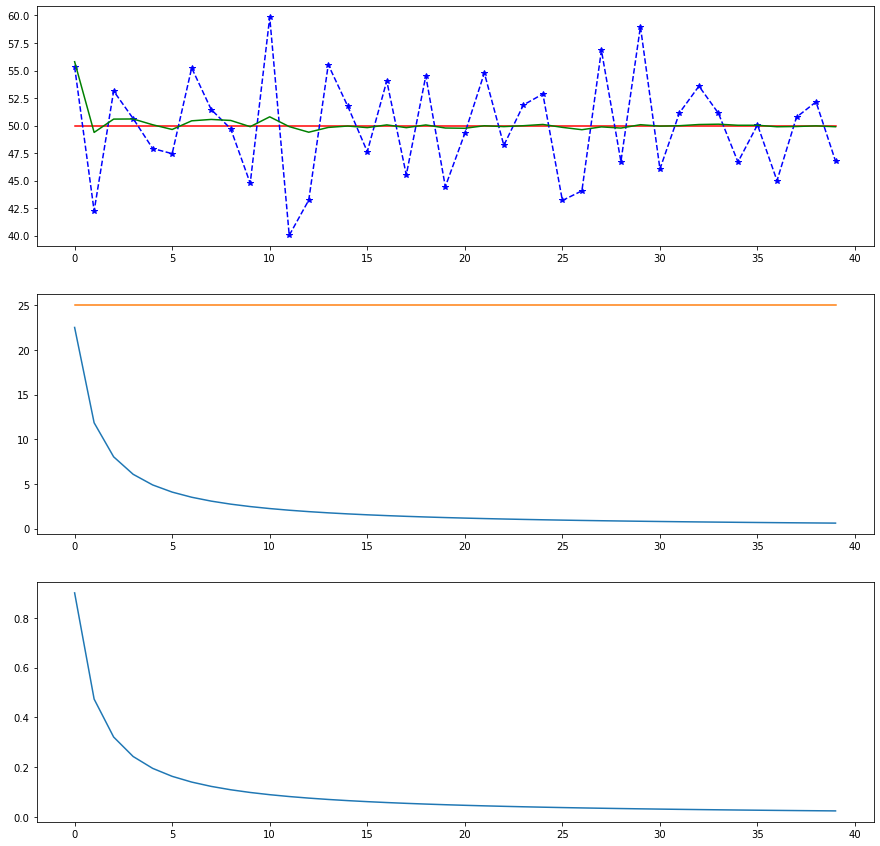

In [278]:
f.plot_result()